In [1]:
# IMPORT
# Standard libray
import sys, os
from importlib import reload
sys.path.append("..")
import collections
import joblib


# Common library
from tqdm import tqdm
import numpy as np
import scipy
from pylab import *
import scipy.interpolate

# ROOT>....
import ROOT
# Make global style changes
ROOT.gStyle.SetOptStat(0) # Disable the statistics box
ROOT.gStyle.SetTextFont(42)
# ROOT.gStyle.SetOptFit(1111)
import atlasplots as aplt
aplt.set_atlas_style()
ROOT.gStyle.SetTitleXOffset(1)
ROOT.gStyle.SetTitleYOffset(1.8)

# Custom helper functions
import muhelper.helper_basic as hp
import helper_tofpet as hptof

reload(hp)

# ROOT.gStyle.SetPalette(len(hptof.mpl_colors), hptof.mpl_colors32)
ROOT.gStyle.SetPalette(ROOT.kViridis)
# colors=[int(c) for c in hptof.mpl_colors ]
colors=hptof.mpl_colors_cls()

Welcome to JupyROOT 6.30/04
Applying ATLAS style settings


In [2]:
data = joblib.load("/home/mathusla/Data/tofpet_data/test_stand_init/data/processed/full_cosmic_2_coinc_hit_final.pkl")
print(data.keys())

dict_keys(['hits', 'tracks', 'vertices'])


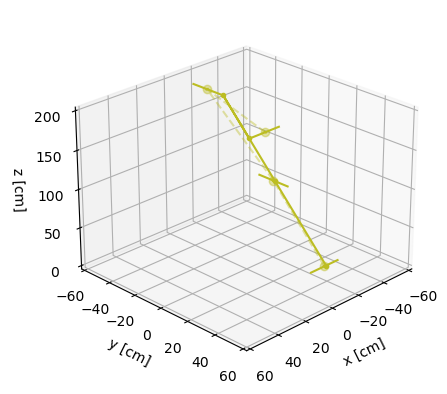

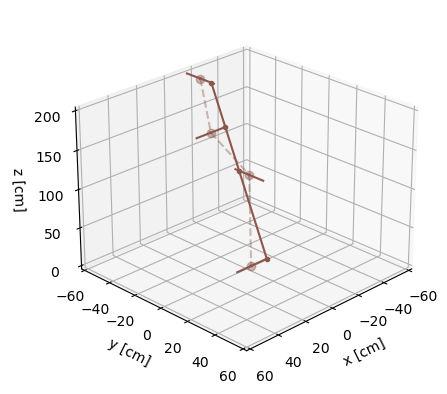

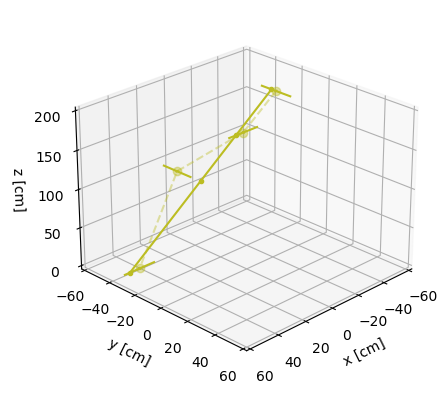

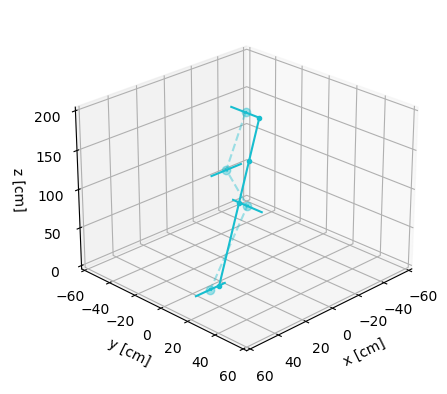

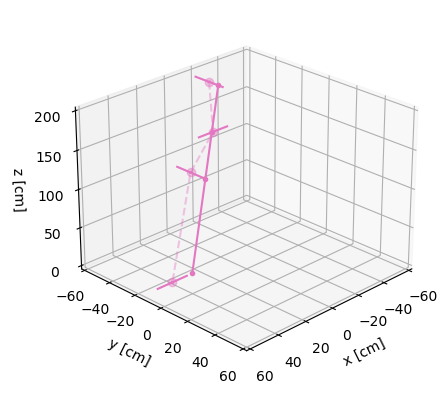

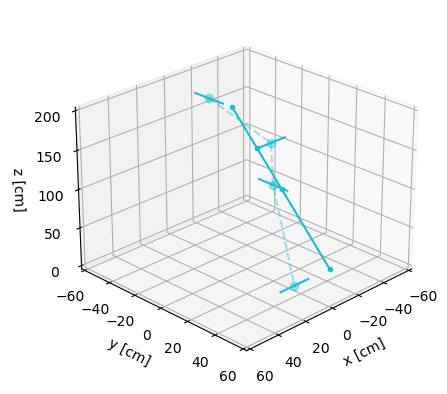

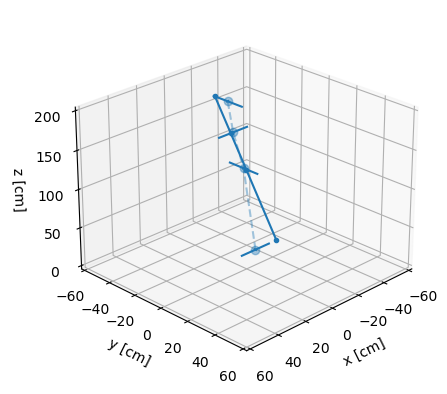

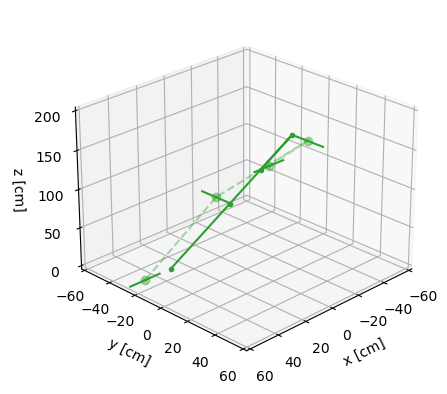

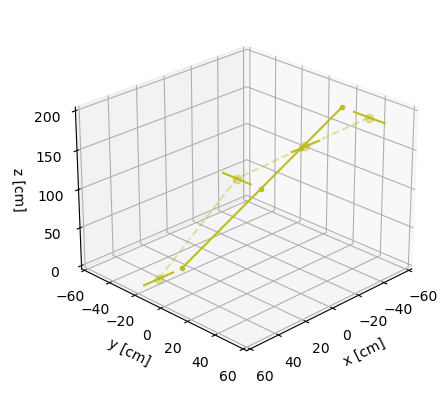

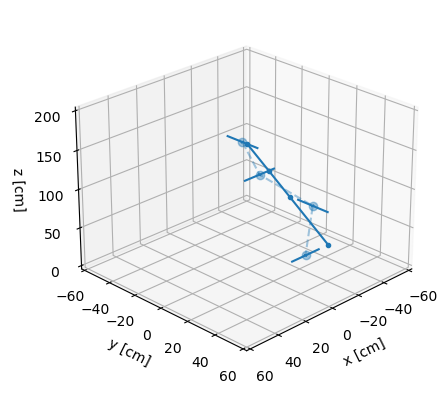

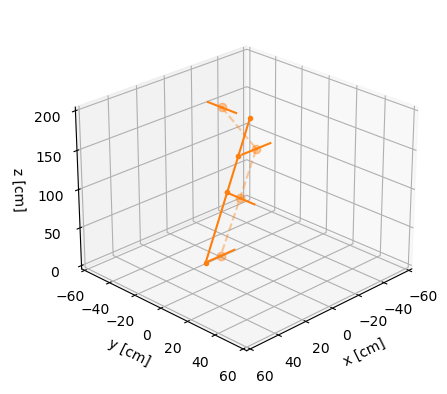

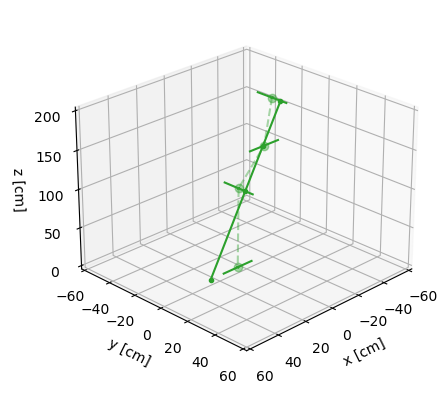

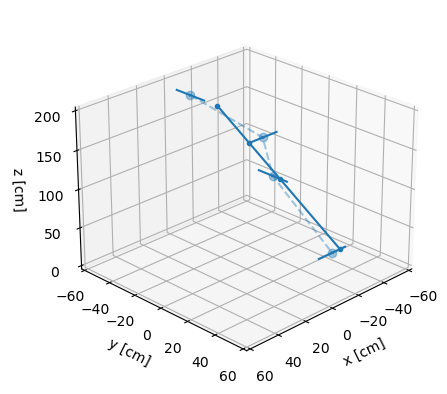

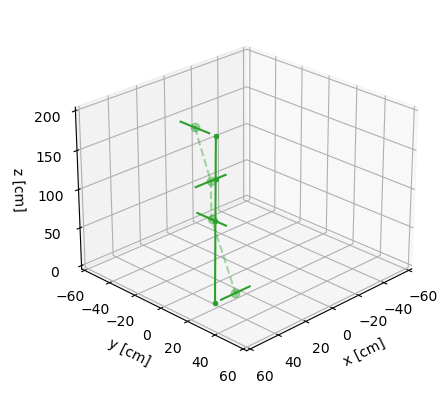

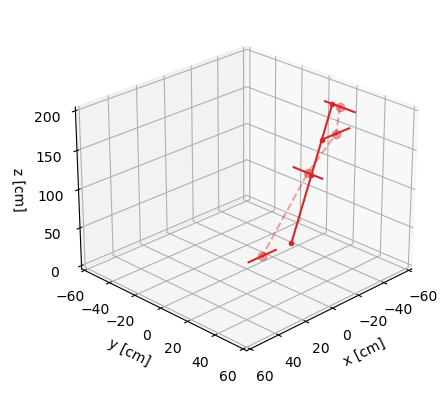

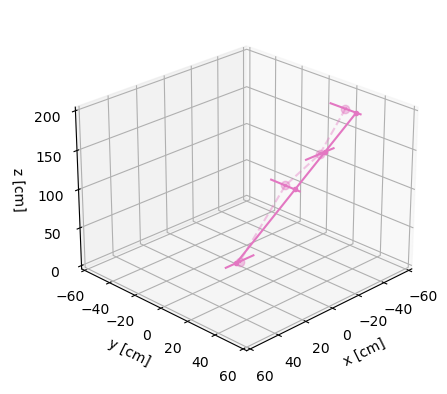

In [3]:
for ievent in range(2025,2190):
    if data['tracks'][ievent] != []:
        hits = data['tracks'][ievent][0].hits
        if len(hits) == 4:
            fig = plt.figure()
            ax = fig.add_subplot(projection='3d', computed_zorder=False)            

            coords = np.array(data['tracks'][ievent][0].hits_filtered)
            x,y,z,t = coords[:,0],coords[:,1],coords[:,2],coords[:,3]
            ax.plot(x,y,z, alpha=1, zorder=ievent, linestyle="-", marker=".",color=f"C{ievent}")

            
            coords = np.array(data['hits'][ievent])[hits,:]
            x,y,z,t,xerr,yerr,zerr,terr = coords[:,0],coords[:,1],coords[:,2],coords[:,3],coords[:,4],coords[:,5],coords[:,6],coords[:,7]
            markers, caps, bars = ax.errorbar(x,y,z,xerr=xerr,yerr=yerr,zerr=zerr,alpha=0.4, zorder=ievent, linestyle="--", marker="o",color=f"C{ievent}")
            [bar.set_alpha(1) for bar in bars]
            [marker.set_alpha(1) for marker in markers]

            ax.view_init(elev=25, azim=45)
            ax.set_xlim(-60,60)
            ax.set_ylim(-60,60)
            ax.set_xlabel("x [cm]")
            ax.set_ylabel("y [cm]")
            ax.set_zlabel("z [cm]")
            show()

[   2.70973371 2332.22388706]
[  4.76260173 764.66758931]


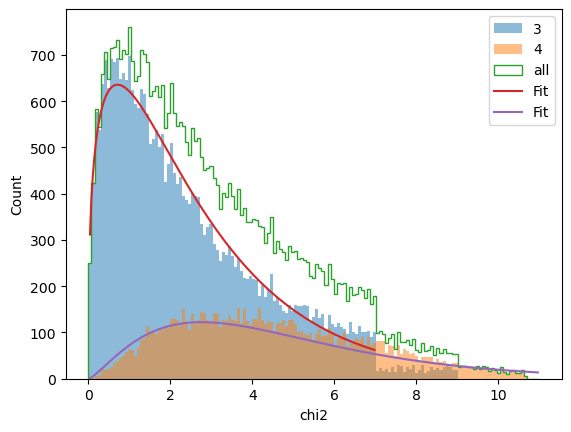

In [4]:
three_hit_chi2 = []
four_hit_chi2 = []
all_chi2 = []

for ievent in range(len(data['tracks'])):
    if data['tracks'][ievent] != []:
        hits = data['tracks'][ievent][0].hits
        if len(hits) == 3:
            three_hit_chi2.append(data['tracks'][ievent][0].chi2)
        elif len(hits) == 4:
            four_hit_chi2.append(data['tracks'][ievent][0].chi2)
        all_chi2.append(data['tracks'][ievent][0].chi2)


bins=np.linspace(0,11,150)
three_data = hist(three_hit_chi2,bins, alpha=0.5, label='3')
four_data = hist(four_hit_chi2,bins, alpha=0.5, label='4')
all_data = hist(all_chi2,bins, histtype='step', label='all')

popt,pconv,info,f = hp.fit_hist(hp.Chi2,three_data, fit_range=[0,7])
print(popt)
popt,pconv,info,f = hp.fit_hist(hp.Chi2,four_data)
print(popt)


plt.legend(loc='upper right')
plt.xlabel("chi2")
plt.ylabel("Count")
plt.savefig("chi2_tracks")
plt.show()

In [12]:
len(three_hit_chi2), len(four_hit_chi2)

(30716, 11169)